### Basic Plots

In [21]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb

file_dir = "./course_resources/"

df = pd.read_csv(file_dir + "heart.csv")

### Bar Plots

In [12]:
chest_pain = df.groupby(by="cp").median().reset_index()
chest_pain.head()

,cp,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,57.0,1.0,130.0,248.0,0.0,0.0,143.0,1.0,1.2,1.0,1.0,3.0,0.0
1,1,52.0,1.0,128.0,238.0,0.0,1.0,163.5,0.0,0.0,2.0,0.0,2.0,1.0
2,2,53.0,1.0,130.0,233.0,0.0,1.0,158.0,0.0,0.5,2.0,0.0,2.0,1.0
3,3,59.0,1.0,140.0,234.0,0.0,0.0,159.0,0.0,1.2,1.0,0.0,2.0,1.0


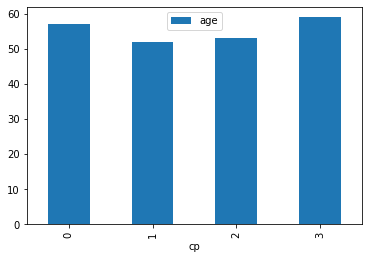

In [14]:
chest_pain.plot.bar(x="cp", y="age");

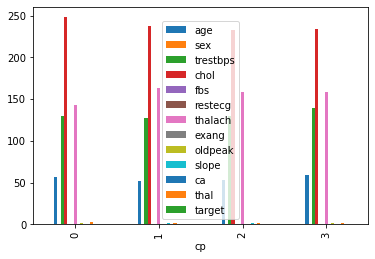

In [15]:
chest_pain.plot.bar(x="cp");

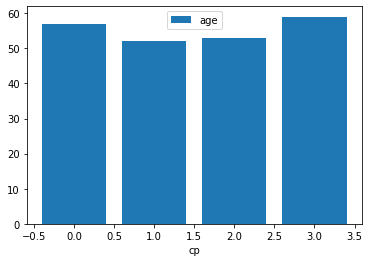

In [16]:
fig, ax = plt.subplots()

ax.bar(chest_pain["cp"], chest_pain["age"], label="age")

ax.set_xlabel("cp")

ax.legend();

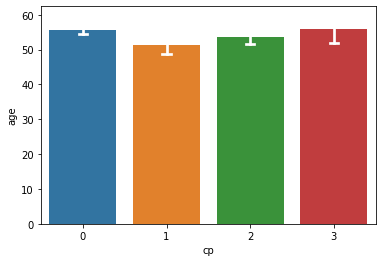

In [18]:
ax = sb.barplot(x="cp", y="age", errcolor="w", capsize=0.1, data=df)

### Scatter Plots

<AxesSubplot:xlabel='age', ylabel='trestbps'>

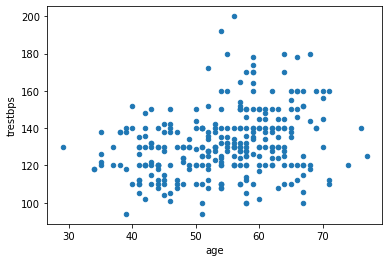

In [19]:
df.plot.scatter("age", "trestbps")

<AxesSubplot:xlabel='age', ylabel='trestbps'>

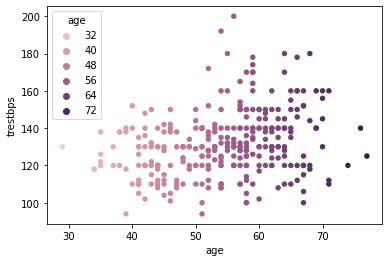

In [21]:
sb.scatterplot(x="age", y="trestbps", hue="age", s=30, edgecolor="none", data=df)

### Line Plots

In [22]:
ages = df.groupby("age").median().reset_index()

ages.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1.0,1.0,130.0,204.0,0.0,0.0,202.0,0.0,0.00,2.0,0.0,2.0,1.0
1,34,0.5,2.0,118.0,196.0,0.0,0.5,183.0,0.0,0.35,2.0,0.0,2.0,1.0
2,35,1.0,0.0,124.0,195.0,0.0,1.0,165.0,0.5,0.70,2.0,0.0,2.5,0.5
3,37,0.5,2.0,125.0,232.5,0.0,1.0,178.5,0.0,1.75,1.0,0.0,2.0,1.0
4,38,1.0,2.0,138.0,175.0,0.0,1.0,173.0,0.0,0.00,2.0,4.0,2.0,1.0


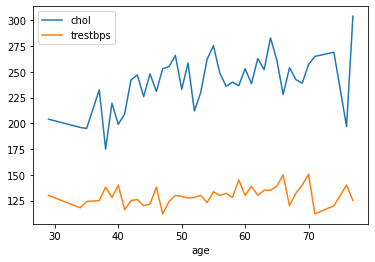

In [25]:
ages.plot.line("age", ["chol", "trestbps"]);

<AxesSubplot:xlabel='age', ylabel='chol'>

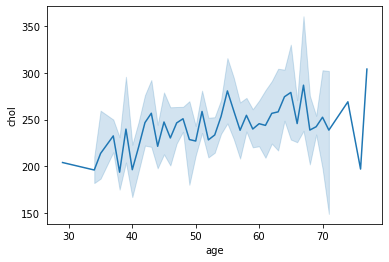

In [27]:
sb.lineplot(x="age", y="chol", data=df)

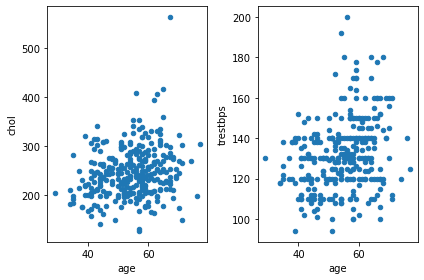

In [30]:
fig, axes = plt.subplots(ncols=2)

df.plot.scatter(x="age", y="chol", ax=axes[0])
df.plot.scatter(x="age", y="trestbps", ax=axes[1])

fig.tight_layout();

In [31]:
fig2 = axes[0].get_figure()

In [37]:
fig2.savefig("./vis/plots.png", bbox_inches="tight", transparent=True)

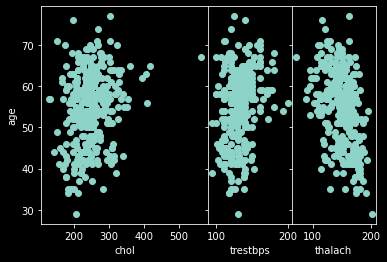

In [43]:
with plt.style.context("dark_background"):
    fig, axes = plt.subplots(ncols=3, sharey=True, gridspec_kw={"width_ratios": [2,1,1],
                                                               "wspace": 0})
    y = "age"
    xs = ["chol", "trestbps", "thalach"]
    
    for x, ax in zip(xs, axes):
        ax.scatter(df[x], df[y])
        ax.set_xlabel(x)
    axes[0].set_ylabel(y)
    
    fig.savefig("./vis/output.png", dpi=100, bbox_inches='tight')
    fig.savefig("./vis/output.pdf", dpi=100, bbox_inches='tight')

### Historgrams 

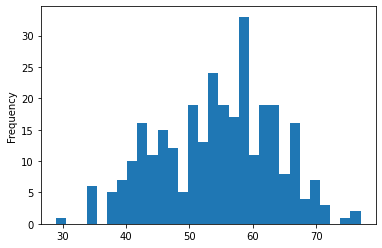

In [3]:
df.age.plot.hist(bins=30);

(array([ 1.,  0.,  0.,  6.,  0.,  5.,  7., 10., 16., 11., 15., 12.,  5.,
        19., 13., 24., 19., 17., 33., 11., 19., 19.,  8., 16.,  4.,  7.,
         3.,  0.,  1.,  2.]),
 array([29. , 30.6, 32.2, 33.8, 35.4, 37. , 38.6, 40.2, 41.8, 43.4, 45. ,
        46.6, 48.2, 49.8, 51.4, 53. , 54.6, 56.2, 57.8, 59.4, 61. , 62.6,
        64.2, 65.8, 67.4, 69. , 70.6, 72.2, 73.8, 75.4, 77. ]),
 <BarContainer object of 30 artists>)

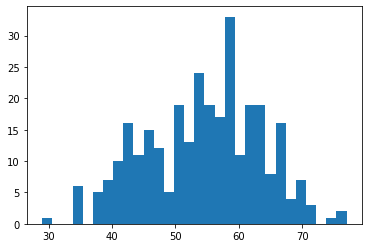

In [4]:
plt.hist(df.age, bins=30)

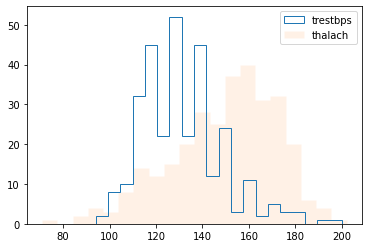

In [8]:
fig, ax = plt.subplots()

ax.hist(df.trestbps, bins=20, histtype="step", label="trestbps")
ax.hist(df.thalach, bins=20, histtype="stepfilled", label="thalach", alpha=0.1, edgecolor="w")
ax.legend();

### Box Plots

<AxesSubplot:>

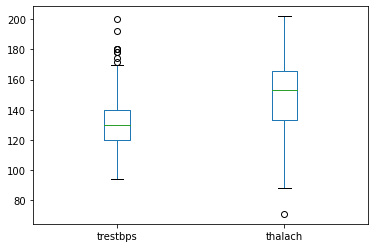

In [9]:
df[["trestbps", "thalach"]].plot.box()

In [10]:
df[["trestbps", "thalach"]].describe()

,trestbps,thalach
count,303.000000,303.000000
mean,131.623762,149.646865
std,17.538143,22.905161
min,94.000000,71.000000
25%,120.000000,133.500000
50%,130.000000,153.000000
75%,140.000000,166.000000
max,200.000000,202.000000


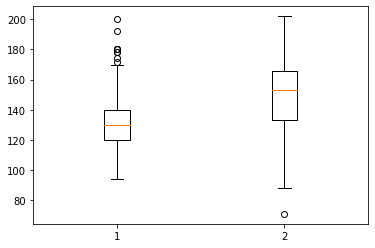

In [11]:
plt.boxplot(df[["trestbps", "thalach"]].to_numpy());

<AxesSubplot:>

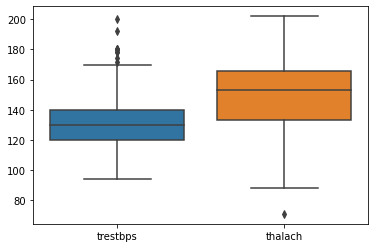

In [12]:
sb.boxplot(data=df[["trestbps", "thalach"]])

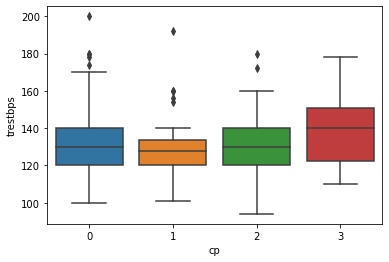

In [13]:
sb.boxplot(x="cp", y="trestbps", data=df);

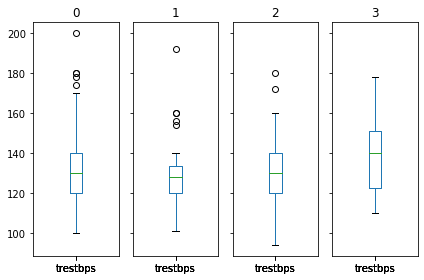

In [14]:
df.groupby("cp").boxplot(column="trestbps", sharex=True, layout=(1,4), grid=False)
plt.tight_layout();

### Violin Plots

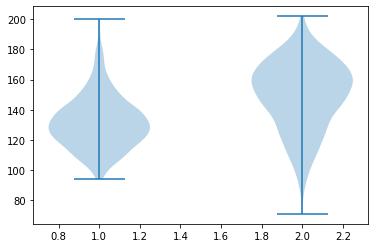

In [17]:
fig, ax = plt.subplots()
ax.violinplot(df[["trestbps", "thalach"]].to_numpy());

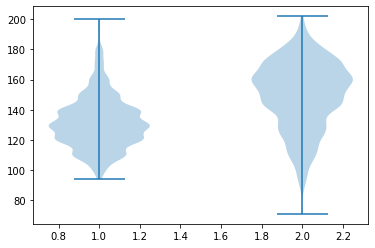

In [18]:
fig, ax = plt.subplots()
ax.violinplot(df[["trestbps", "thalach"]].to_numpy(), bw_method=0.2);

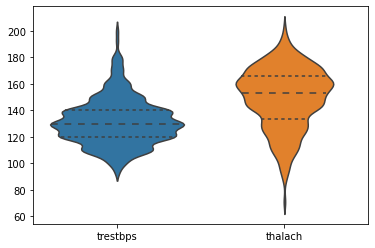

In [19]:
sb.violinplot(data=df[["trestbps", "thalach"]], inner="quartile", bw=0.2);

### Bee Swarm Plots

<AxesSubplot:>

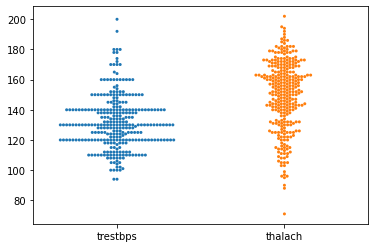

In [20]:
sb.swarmplot(data=df[["trestbps", "thalach"]], size =3 )

<AxesSubplot:>

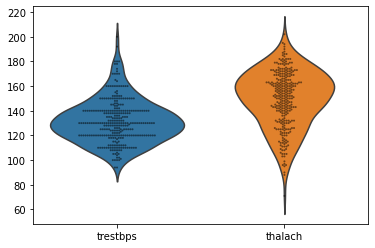

In [22]:
sb.violinplot(data=df[["trestbps", "thalach"]], inner=None);
sb.swarmplot(data=df[["trestbps", "thalach"]], size =2, color = "k", alpha=0.5 )

In [26]:
df = pd.read_csv(file_dir + "meteorite-landings.csv")
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [32]:
df = df.dropna(subset=["reclong", "reclat"])
df = df[df.reclong < 300]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38400 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         38400 non-null  object 
 1   id           38400 non-null  int64  
 2   nametype     38400 non-null  object 
 3   recclass     38400 non-null  object 
 4   mass         38282 non-null  float64
 5   fall         38400 non-null  object 
 6   year         38225 non-null  float64
 7   reclat       38400 non-null  float64
 8   reclong      38400 non-null  float64
 9   GeoLocation  38400 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.2+ MB


### 2d Histograms 

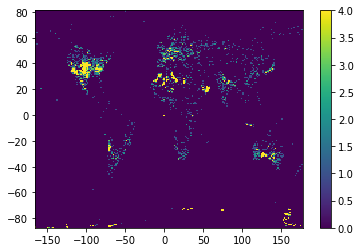

In [35]:
plt.hist2d(df.reclong, df.reclat, bins =200, vmax=4)
plt.colorbar();

### 2d Hex Plots

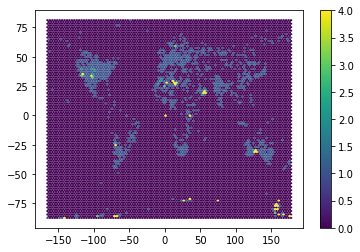

In [38]:
plt.hexbin(df.reclong, df.reclat, bins =200, vmax=4, lw=0.0)
plt.colorbar();

<AxesSubplot:xlabel='reclong', ylabel='reclat'>

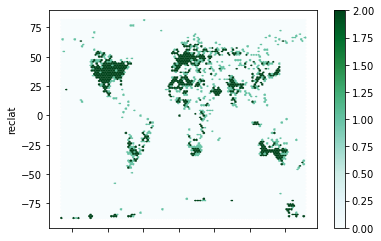

In [42]:
df.plot.hexbin(x="reclong", y="reclat", vmax=2, gridsize=100, linewidth = 0.25)

### Jointplots

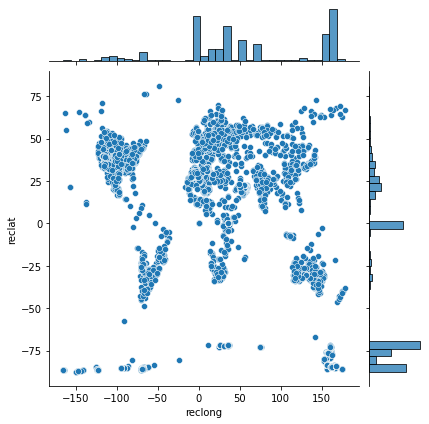

In [43]:
sb.jointplot(data=df, x="reclong", y="reclat")

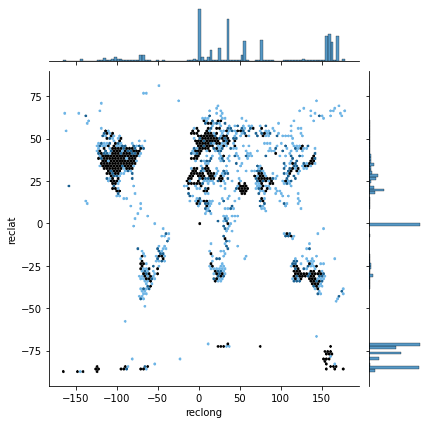

In [46]:
sb.jointplot(data=df, x="reclong", y="reclat", kind="hex", gridsize=100, vmax=3, linewidth=0, marginal_kws={"bins": 100});

In [1]:
sb.pairplot(data=df[["reclat", "reclong", "mass"]])

NameError: name 'sb' is not defined

In [3]:
import numpy as np
import pandas as pd

In [5]:
df = pd.DataFrame(np.random.normal(size=(6,6)), columns=[x for x in "ABCDEF"])
df

,A,B,C,D,E,F
0,-1.420451,-0.913546,-1.707148,-0.864415,-0.819372,-1.167110
1,-0.040800,-0.251313,0.879374,1.497969,-1.202105,0.434581
2,1.095864,-0.445265,-1.295816,-0.436808,-1.405877,-1.438374
3,0.093433,-1.267355,-0.952518,-0.139414,-1.463323,-2.701147
4,-2.081550,0.585414,0.310653,-0.629557,-2.336805,0.442862
5,1.040197,-0.872020,-0.277095,-0.572618,-0.582499,0.010356


In [11]:
def neg_red(x):
    return f"color: {'red' if x < 0 else 'grey'}"

df.style.applymap(neg_red)

,A,B,C,D,E,F
0,-1.420451,-0.913546,-1.707148,-0.864415,-0.819372,-1.167110
1,-0.040800,-0.251313,0.879374,1.497969,-1.202105,0.434581
2,1.095864,-0.445265,-1.295816,-0.436808,-1.405877,-1.438374
3,0.093433,-1.267355,-0.952518,-0.139414,-1.463323,-2.701147
4,-2.081550,0.585414,0.310653,-0.629557,-2.336805,0.442862
5,1.040197,-0.872020,-0.277095,-0.572618,-0.582499,0.010356


In [14]:
def gold_max(xs):
    m = xs.to_numpy().max()
    color = {True: "background-color: #c78f2e", False: ""}
    is_max = (xs == m).replace(color)
    return is_max
df.style.apply(gold_max, axis=None)

,A,B,C,D,E,F
0,-1.420451,-0.913546,-1.707148,-0.864415,-0.819372,-1.167110
1,-0.040800,-0.251313,0.879374,1.497969,-1.202105,0.434581
2,1.095864,-0.445265,-1.295816,-0.436808,-1.405877,-1.438374
3,0.093433,-1.267355,-0.952518,-0.139414,-1.463323,-2.701147
4,-2.081550,0.585414,0.310653,-0.629557,-2.336805,0.442862
5,1.040197,-0.872020,-0.277095,-0.572618,-0.582499,0.010356


In [18]:
df.style.apply(gold_max, axis=None).applymap(neg_red)

,A,B,C,D,E,F
0,-1.420451,-0.913546,-1.707148,-0.864415,-0.819372,-1.167110
1,-0.040800,-0.251313,0.879374,1.497969,-1.202105,0.434581
2,1.095864,-0.445265,-1.295816,-0.436808,-1.405877,-1.438374
3,0.093433,-1.267355,-0.952518,-0.139414,-1.463323,-2.701147
4,-2.081550,0.585414,0.310653,-0.629557,-2.336805,0.442862
5,1.040197,-0.872020,-0.277095,-0.572618,-0.582499,0.010356


In [15]:
df.style.background_gradient(cmap="magma")

,A,B,C,D,E,F
0,-1.420451,-0.913546,-1.707148,-0.864415,-0.819372,-1.167110
1,-0.040800,-0.251313,0.879374,1.497969,-1.202105,0.434581
2,1.095864,-0.445265,-1.295816,-0.436808,-1.405877,-1.438374
3,0.093433,-1.267355,-0.952518,-0.139414,-1.463323,-2.701147
4,-2.081550,0.585414,0.310653,-0.629557,-2.336805,0.442862
5,1.040197,-0.872020,-0.277095,-0.572618,-0.582499,0.010356


In [16]:
df.abs().style.bar(align="left", width=90)

,A,B,C,D,E,F
0,1.420451,0.913546,1.707148,0.864415,0.819372,1.167110
1,0.040800,0.251313,0.879374,1.497969,1.202105,0.434581
2,1.095864,0.445265,1.295816,0.436808,1.405877,1.438374
3,0.093433,1.267355,0.952518,0.139414,1.463323,2.701147
4,2.081550,0.585414,0.310653,0.629557,2.336805,0.442862
5,1.040197,0.872020,0.277095,0.572618,0.582499,0.010356


In [17]:
head = {"selector": "th", "props": [("text-align", "center")]}

df.style.set_table_styles([head]).bar(align="mid", color=['red', 'green'], vmin=-3, vmax=3)

,A,B,C,D,E,F
0,-1.420451,-0.913546,-1.707148,-0.864415,-0.819372,-1.167110
1,-0.040800,-0.251313,0.879374,1.497969,-1.202105,0.434581
2,1.095864,-0.445265,-1.295816,-0.436808,-1.405877,-1.438374
3,0.093433,-1.267355,-0.952518,-0.139414,-1.463323,-2.701147
4,-2.081550,0.585414,0.310653,-0.629557,-2.336805,0.442862
5,1.040197,-0.872020,-0.277095,-0.572618,-0.582499,0.010356


In [19]:
df.to_numpy().max()

1.4979690052983001

In [20]:
df.max()

A    1.095864
B    0.585414
C    0.879374
D    1.497969
E   -0.582499
F    0.442862
dtype: float64

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn import manifold

df = pd.read_csv(file_dir + "heart.csv")
target = df["target"].to_numpy()
df = df[["age", "sex", "cp", "trestbps", "chol", "thalach"]]

df.head()

,age,sex,cp,trestbps,chol,thalach
0,63,1,3,145,233,150
1,37,1,2,130,250,187
2,41,0,1,130,204,172
3,56,1,1,120,236,178
4,57,0,0,120,354,163


### Scatter Matrix 

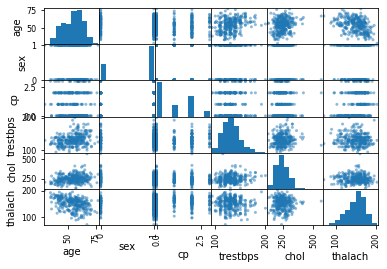

In [26]:
pd.plotting.scatter_matrix(df);

In [27]:
df.corr()

,age,sex,cp,trestbps,chol,thalach
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,-0.398522
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,-0.044020
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.295762
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,-0.046698
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,-0.009940
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,1.000000


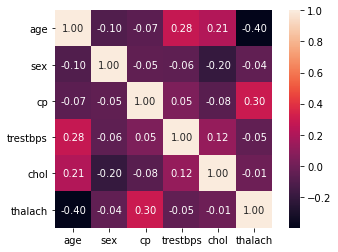

In [31]:
ax = sb.heatmap(df.corr(), annot=True, fmt="0.2f", square=True);